# Описание задания

**Цель лабораторной работы:** изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

# Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.
5. Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.
6. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.
7. Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.
8. Постройте кривые обучения и валидации.

# Ход выполнения лабораторной работы

## Выбор датасета

В качестве набора данных мы будем использовать набор данных по состоянию ходьбы человека - https://www.kaggle.com/vmalyi/run-or-walk. Датасет состоит из 88588 наборов значений взятых с акселерометра и гироскопа. Данные собирались на устройство iPhone 5c, который был закреплен на запястье человека(левое и правое). Информация о данных бралась каждые 10 секунд. Задача определения активности по электронным устройствам является актуальной для легкоатлетов.

In [1]:
from google.colab import drive, files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
os.listdir()
data = pd.read_csv('drive/My Drive/mmo_datasets/row_dataset.csv', sep=",")

In [0]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0:
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'
              .format(col, dt, temp_null_count, temp_perc))

data_cleared = data

In [4]:
uniquevalues = np.unique(data_cleared['activity'].values)
uniquevalues

array([0, 1])

In [5]:
data_cleared.head(10)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,2017-6-30,13:51:17:46806991,viktor,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,2017-6-30,13:51:17:246767997,viktor,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473
7,2017-6-30,13:51:17:446569025,viktor,0,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348
8,2017-6-30,13:51:17:646152973,viktor,0,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759
9,2017-6-30,13:51:17:846502006,viktor,0,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982


## train_test_split

In [0]:
data_cleared = data_cleared.drop('date', axis=1)
data_cleared = data_cleared.drop('time', axis=1)
data_cleared = data_cleared.drop('username', axis=1)


target = data_cleared['activity']
data_cleared = data_cleared.drop('activity', axis=1)

In [7]:
data_cleared.head(10)

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473
7,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348
8,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759
9,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data_cleared, 
    target, 
    test_size=0.2, 
    random_state=1
)

In [9]:
X_train.shape, Y_train.shape

((70870, 7), (70870,))

In [10]:
X_test.shape, Y_test.shape

((17718, 7), (17718,))

## Обучение для произвольного параметра K

In [0]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
predicted = knn_model.predict(X_test)
predicted

array([1, 0, 0, ..., 1, 1, 1])

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predicted)

0.9892200022575911

In [14]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, predicted)

0.9893326136143525

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data   
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


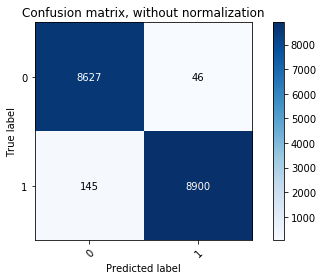

In [16]:
plot_confusion_matrix(Y_test, predicted, 
                      classes=np.array(['0', '1']),
                      title='Confusion matrix, without normalization')

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score
(precision_score(Y_test, predicted, average='weighted'), 
 recall_score(Y_test, predicted, average='weighted'))

(0.9892836326099101, 0.9892200022575911)

In [18]:
f1_score(Y_test, predicted, average='weighted')

0.9892209305616176

## Построение модели и оценка с помощью кросс-валидации

In [0]:
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_validate

scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [20]:
scores1 = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data_cleared,
                         target,
                         scoring=scoring, 
                         cv=KFold(n_splits=3), 
                         return_train_score=True
                        )
scores1

{'fit_time': array([0.04464912, 0.04308128, 0.04944682]),
 'score_time': array([3.06341839, 3.10153389, 3.24147558]),
 'test_f1': array([0.98090209, 0.98762213, 0.93926346]),
 'test_precision': array([0.98150631, 0.98765269, 0.94727472]),
 'test_recall': array([0.98086692, 0.9876054 , 0.93816248]),
 'train_f1': array([0.9902572 , 0.99190481, 0.99461045]),
 'train_precision': array([0.9904395 , 0.99205678, 0.99466485]),
 'train_recall': array([0.99026381, 0.99188947, 0.99461555])}

In [22]:
scores2 = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data_cleared,
                         target,
                         scoring=scoring, 
                         cv=ShuffleSplit(n_splits=3, test_size=0.25), 
                         return_train_score=True
                        )
scores2

{'fit_time': array([0.06723833, 0.05582952, 0.05907083]),
 'score_time': array([2.28498197, 2.24624991, 2.25549293]),
 'test_f1': array([0.98451163, 0.98514311, 0.98640819]),
 'test_precision': array([0.98484146, 0.98540694, 0.98662956]),
 'test_recall': array([0.98451258, 0.98514471, 0.98640899]),
 'train_f1': array([0.99143534, 0.99164624, 0.99098379]),
 'train_precision': array([0.99158014, 0.99178417, 0.99114424]),
 'train_recall': array([0.99143601, 0.99164672, 0.99098448])}

In [23]:
scores3 = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data_cleared,
                         target,
                         scoring=scoring, 
                         cv=StratifiedShuffleSplit(n_splits=3, test_size=0.2), 
                         return_train_score=True
                        )
scores3

{'fit_time': array([0.0589726 , 0.06245089, 0.06663036]),
 'score_time': array([1.80771017, 1.81689453, 2.08004069]),
 'test_f1': array([0.98526722, 0.98408184, 0.98453388]),
 'test_precision': array([0.98557196, 0.9843833 , 0.98477332]),
 'test_recall': array([0.98526922, 0.98408398, 0.9845355 ]),
 'train_f1': array([0.99167443, 0.99195669, 0.99160387]),
 'train_precision': array([0.99181146, 0.99208463, 0.99174321]),
 'train_recall': array([0.9916749 , 0.9919571 , 0.99160435])}

In [24]:
print("%s, %s, %s" % (np.mean(scores1["test_precision"]),
                      np.mean(scores2["test_precision"]), 
                      np.mean(scores3["test_precision"])))

0.97214457608351, 0.9856259853432557, 0.9849095262251883


Лучшую точность модели получилось достичь с использованием стратегии кросс-валидации KFold.

## Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [27]:
n_range = np.array(range(2,12,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  4,  6,  8, 10])}]

In [29]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

clf_gs = GridSearchCV(KNeighborsClassifier(), 
                      tuned_parameters, 
                      cv=ShuffleSplit(n_splits=2, test_size=0.25), 
                      scoring='accuracy')
clf_gs.fit(X_train, Y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=None, test_size=0.25, train_size=None),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 2,  4,  6,  8, 10])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [30]:
clf_gs.best_params_

{'n_neighbors': 8}

In [31]:
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

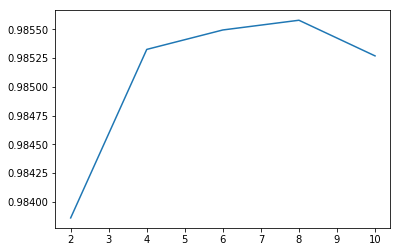

In [33]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Сравнение качества обучения моделей

In [36]:
knn_best_model = KNeighborsClassifier(n_neighbors=clf_gs.best_params_["n_neighbors"])
knn_best_model.fit(X_train, Y_train)
predicted_best = knn_best_model.predict(X_test)
predicted_best

array([1, 0, 0, ..., 1, 1, 1])

In [37]:
(accuracy_score(Y_test, predicted), 
 accuracy_score(Y_test, predicted_best))

(0.9892200022575911, 0.9875832486736652)

Confusion matrix, without normalization


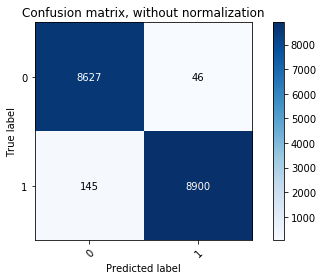

In [38]:
plot_confusion_matrix(Y_test, predicted, 
                      classes=np.array(['0', '1']),
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization


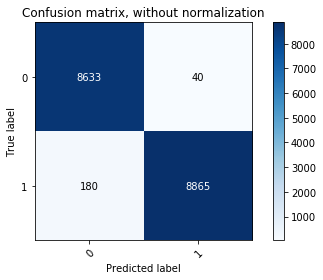

In [39]:
plot_confusion_matrix(Y_test, predicted_best, 
                      classes=np.array(['0', '1']),
                      title='Confusion matrix, without normalization')

In [40]:
(precision_score(Y_test, predicted, average='weighted'), 
precision_score(Y_test, predicted_best, average='weighted'))

(0.9892836326099101, 0.9877091405373646)

In [41]:
(recall_score(Y_test, predicted, average='weighted'), 
recall_score(Y_test, predicted_best, average='weighted'))

(0.9892200022575911, 0.9875832486736652)

In [42]:
(f1_score(Y_test, predicted, average='weighted'), 
f1_score(Y_test, predicted_best, average='weighted'))

(0.9892209305616176, 0.9875845335729195)

Таким образом, подбор гиперпараметра позволил улучшить результаты оценки модели посредством всех представленных метрик.

## Кривые обучения и валидации

In [0]:
from sklearn.model_selection import learning_curve, validation_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
  
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):                                        
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

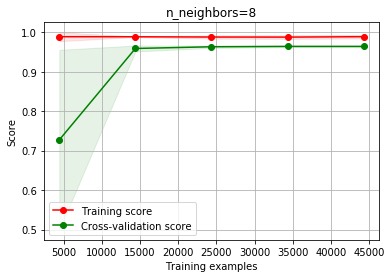

In [45]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=8), 
                    'n_neighbors=8', 
                    data_cleared,
                    target,
                    cv=2
                   )

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

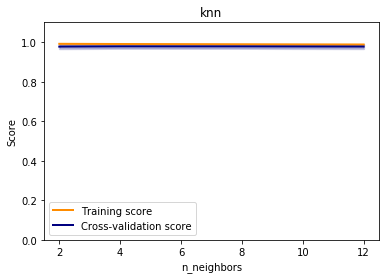

In [46]:
n_range2 = np.array(range(2,14,2))

plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      data_cleared,
                      target, 
                      param_name='n_neighbors', 
                      param_range=n_range2, 
                      cv=4, 
                      scoring="accuracy"
                     )